# Notebook used to analyze communities of interest on Reddit, such as the sources they share on the active users

In [1]:
import importlib
import covidStream

from psaw import PushshiftAPI
import tweepy, praw

from wordcloud import WordCloud, STOPWORDS 
import json
import re
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import datetime as dt
import time, functools, operator
from collections import Counter, defaultdict

from bs4 import BeautifulSoup
from requests import get

import networkx as nx

### Twitter, Youtube and Reddit API Setup

In [2]:
with open("Credentials/redditCredentials.json", "r") as redditFile:
    redditCredentials = json.load(redditFile)

In [3]:
reddit = praw.Reddit(client_id=redditCredentials['client_id'], \
                     client_secret=redditCredentials['client_secret'], \
                     user_agent='test', \
                     username=redditCredentials['username'], \
                     password=redditCredentials['password'])

psawAPI = PushshiftAPI(reddit)

In [4]:
with open("Credentials/twitterCredentials.json", "r") as twitterFile:
    twitterCredentials = json.load(twitterFile)

In [5]:
auth = tweepy.OAuthHandler(twitterCredentials['consumer_key'], twitterCredentials['consumer_secret'])
auth.set_access_token(twitterCredentials['access_key'], twitterCredentials['access_secret'])
twitterAPI = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

## 1st Cluster: The Feed Cluster 

In [8]:
psawAPI.redditor_subreddit_activity('thefeedbot')

{'comment': Counter(),
 'submission': Counter({'TheNewsFeed': 702408,
          'TheTwitterFeed': 388165,
          'OneAmericaNews': 114692,
          'TheBlogFeed': 95615,
          'TheInfowarsFeed': 54133,
          'TheVideoFeed': 38277,
          'ThePodcastFeed': 22470,
          'TheCartoonFeed': 16399,
          'TheMusicFeed': 6107,
          'ThePrager': 753,
          'ATD_Sandbox': 2,
          'TheInstagramFeed': 1})}

### u/IronWolve analysis

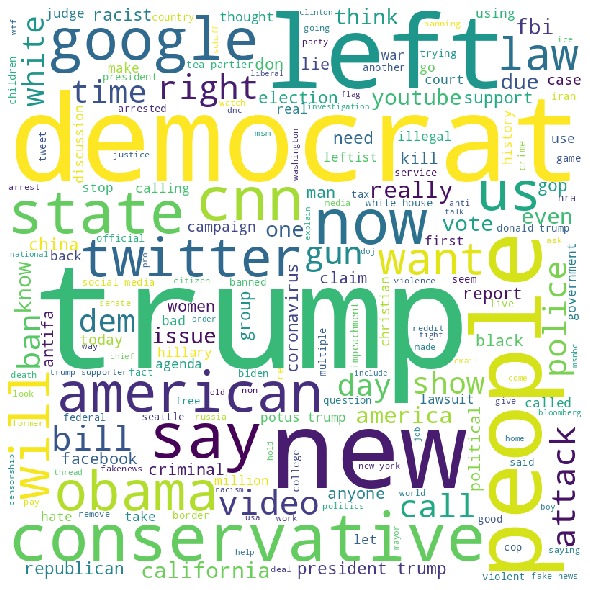

In [41]:
importlib.reload(covidStream)
covidStream.user_activity_wordcloud('IronWolve', psawAPI, submissionsAnalysis=True)

In [11]:
wolveTrumpList = list(psawAPI.search_submissions(subreddit='AskThe_Donald', author='IronWolve', filter=['created_at', 'title']))

In [21]:
wolveList = list(psawAPI.search_comments(subreddit='AskThe_Donald', author='IronWolve', filter=['created_at']))

In [27]:
createdDates = [dt.datetime.strptime(time.ctime(submission.created_utc), '%a %b %d %H:%M:%S %Y').date() for submission in wolveTrumpList]
datesStringList = [date.strftime('%y-%m-%d') for date in createdDates]
datesColumns = Counter(datesStringList)

In [22]:
createdDates2 = [dt.datetime.strptime(time.ctime(submission.created_utc), '%a %b %d %H:%M:%S %Y').date() for submission in wolveList]
datesStringList2 = [date.strftime('%y-%m-%d') for date in createdDates2]
datesColumns2 = list(set(datesStringList2))
datesColumns2.sort()

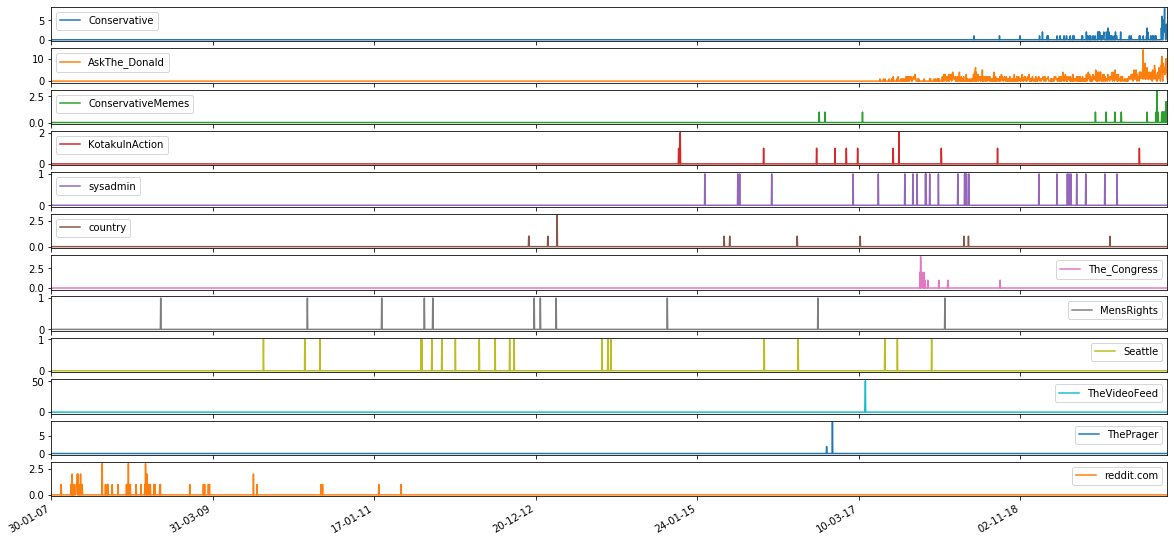

In [9]:
importlib.reload(covidStream)
covidStream.user_activity_timeline('IronWolve', psawAPI)

In [ ]:
importlib.reload(covidStream)
urlCounter = covidStream.website_retrieval('IronWolve', psawAPI)

In [53]:
importlib.reload(covidStream)
subredditList = ['AskThe_Donald', 'The_Donald', 'politics', 'Conservative', 'Libertarian', 'MensRights', 'Bad_Cop_No_Donut', 'worldnews', 'conspiracy', 'Republican',
                 'uncensorednews', 'gunpolitics', 'progun', 'science', 'Democrat', '4chan', 'menkampf']
urlDF = covidStream.subreddit_user_activity('IronWolve', subredditList=subredditList, psawAPI=psawAPI, nrows=2, ncols=2, linkAnalysis=True)

AskThe_Donald
The_Donald
politics
Conservative
Libertarian
MensRights
Bad_Cop_No_Donut
worldnews
conspiracy
Republican
uncensorednews
gunpolitics
progun
science
Democrat
4chan
menkampf


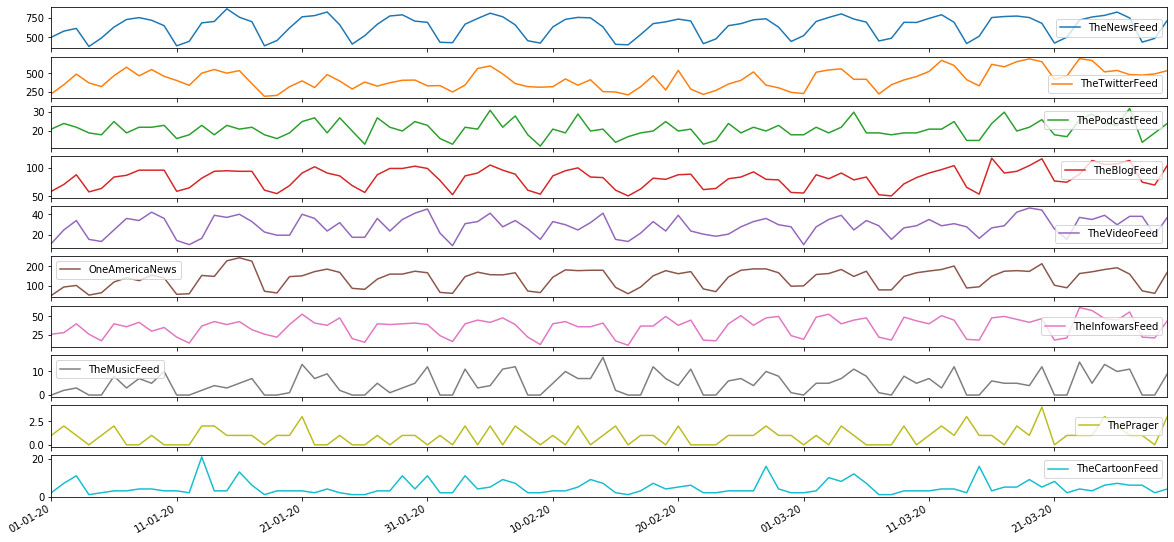

In [9]:
startEpoch = int(dt.datetime(2020, 1, 1).timestamp())
endEpoch = int(dt.datetime(2020, 3, 31).timestamp())
covidStream.user_activity_timeline('thefeedbot', psawAPI, startEpoch, endEpoch)

## u/thefeedbot analysis

### r/TheNewsFeed Analysis

In [ ]:
importlib.reload(covidStream)
covidStream.newsfeed_analysis('TheNewsFeed', psawAPI)

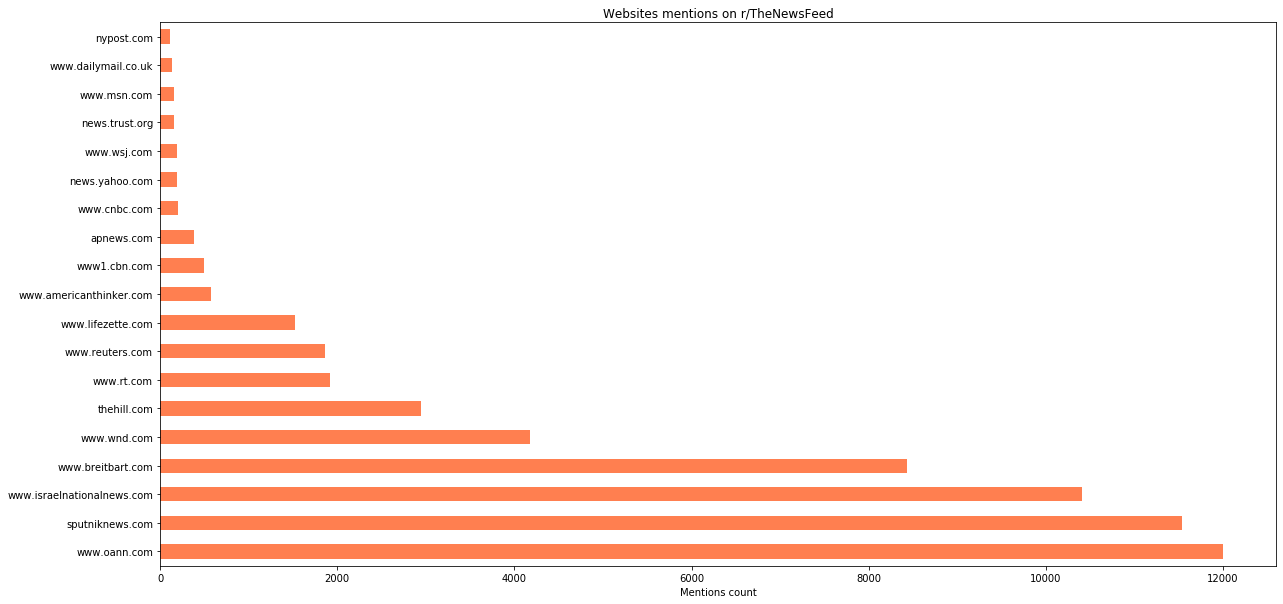

In [112]:
importlib.reload(covidStream)
newsDF = covidStream.news_feed_summary('NewsFeed/')

### r/TheTwitterFeed Analysis

In [8]:
importlib.reload(covidStream)
tweetFeedDF = covidStream.twitter_accounts_retrieval('TheTwitterFeed', psawAPI, twitterAPI)

21
Time:  2338.5920090675354
Error with:  @MaydnUSA
Error with:  @Gavin_McInnes
End:  5.145118713378906


In [ ]:
importlib.reload(covidStream)
tweetFeedDF = pd.read_csv('TwitterFeed/tweetFeedDF.csv')
usernameList = list(tweetFeedDF.author.values)
userDF = covidStream.twitter_feed_user_activity(usernameList=usernameList, psawAPI=psawAPI)

In [ ]:
importlib.reload(covidStream)
subredditList = ['TheTwitterFeed', 'TheVideoFeed', 'TheInfowarsFeed', 'TheNewsFeed', 'AskThe_Donald', 'OneAmericaNews'] # Subreddits where IronWolve is moderator

for subreddit in subredditList:
    print(subreddit)
    covidStream.subreddit_contributor_extraction(subreddit, psawAPI)

## 2nd Cluster: The New World Order Cluster

### URL analysis

In [73]:
importlib.reload(covidStream)
covidStream.newsfeed_analysis('ConspiracyisNews', psawAPI)

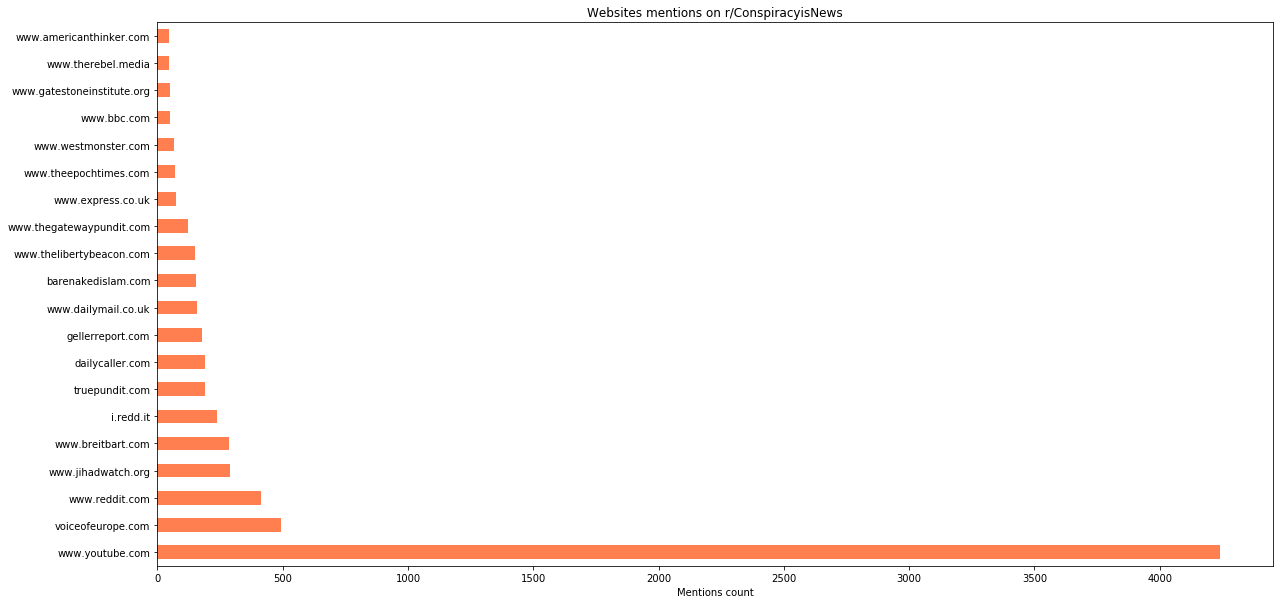

In [74]:
importlib.reload(covidStream)
newsDF = covidStream.news_feed_summary('ConspiracyisNews/')

In [ ]:
importlib.reload(covidStream)
tweetFeedDF = covidStream.twitter_accounts_retrieval('ChristiansAwake2NWO', psawAPI, twitterAPI)

### kjfriend2 Analysis

In [8]:
psawAPI.redditor_subreddit_activity('kjfriend2')

{'comment': Counter({'ChristiansAwake2NWO': 1713,
          'CA2NWO': 1524,
          'Christianity': 1053,
          'ConspiracyisNews': 740,
          'WesternTraditions': 57,
          'PedoGate': 51,
          'Trump_Conservative': 31,
          'EcoLiberty': 29,
          'The_Donald': 10,
          'Christian': 7,
          'The_Donald_CA': 5,
          'help': 5,
          'conspiracy_commons': 4,
          'modhelp': 4,
          'redditrequest': 3,
          'ConservativeNewsWeb': 2,
          'Conservative': 1,
          'FreedomNewsPolitics': 1,
          'news': 1}),
 'submission': Counter({'CA2NWO': 20041,
          'ConspiracyisNews': 10645,
          'ChristiansAwake2NWO': 8888,
          'WesternTraditions': 588,
          'Trump_Conservative': 465,
          'EcoLiberty': 350,
          'PedoGate': 115,
          'The_Donald': 19,
          'Christianity': 9,
          'The_Donald_CA': 8,
          'redditrequest': 5,
          'help': 3,
          'conspiracy': 2,
   

In [9]:
importlib.reload(covidStream)
subredditList = ['ChristiansAwake2NWO', 'CA2NWO', 'ConspiracyisNews', 'Christianity', 'PedoGate', 'Trump_Conservative', 'The_Donald', 'EcoLiberty', 'WesternTraditions']
urlDF = covidStream.subreddit_user_activity('kjfriend2', subredditList=subredditList, psawAPI=psawAPI, nrows=2, ncols=2, linkAnalysis=True)

ChristiansAwake2NWO
CA2NWO
ConspiracyisNews
Christianity
PedoGate
Trump_Conservative
The_Donald
EcoLiberty
WesternTraditions


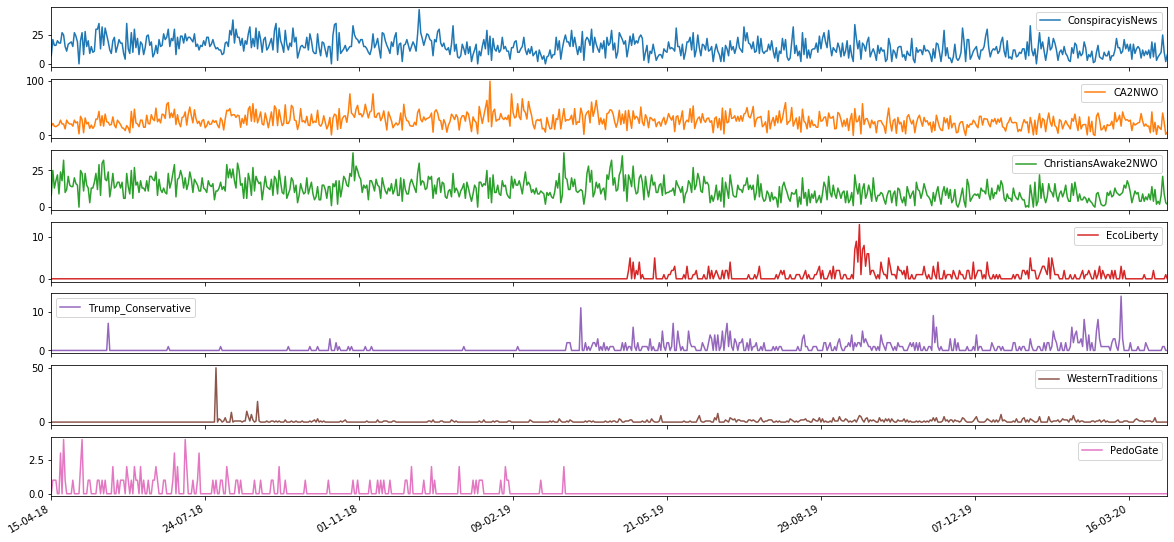

In [11]:
importlib.reload(covidStream)
covidStream.user_activity_timeline('kjfriend2', psawAPI)

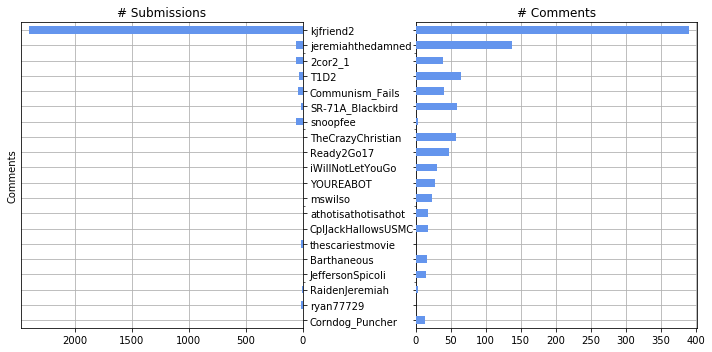

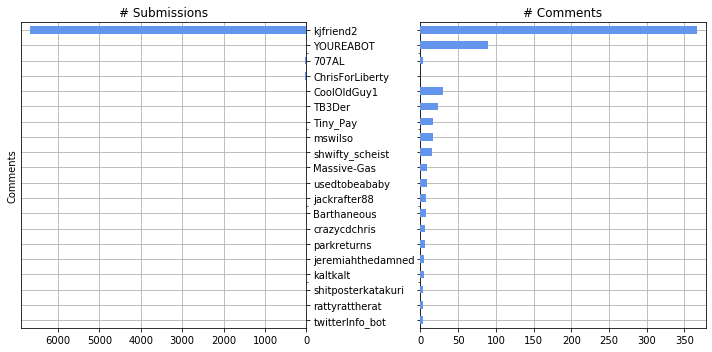

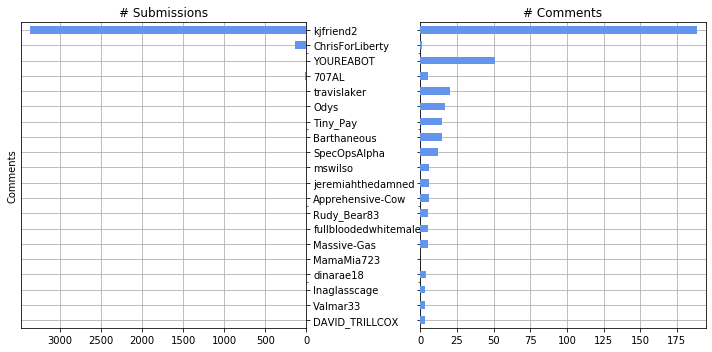

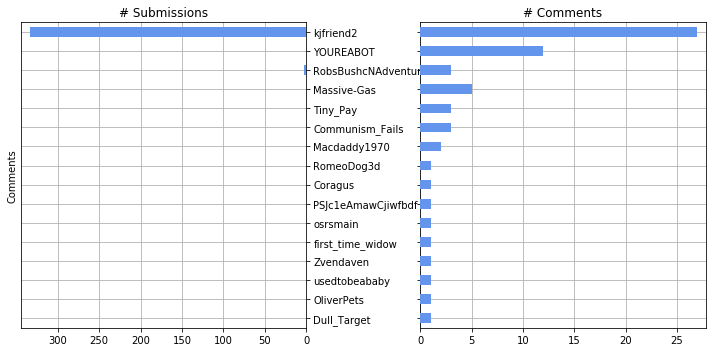

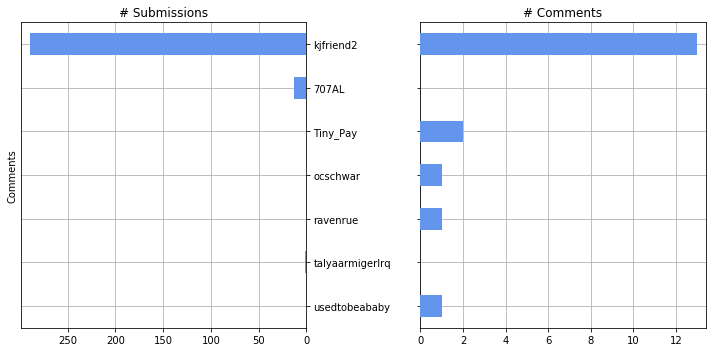

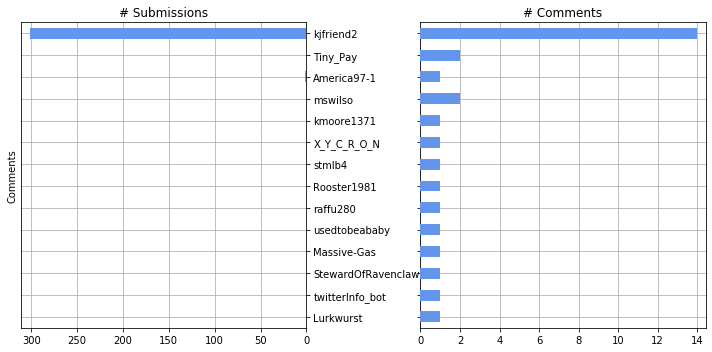

In [58]:
importlib.reload(covidStream)
subredditList = ['ChristiansAwake2NWO', 'CA2NWO', 'ConspiracyisNews', 'WesternTraditions', 'EcoLiberty', 'Trump_Conservative'] # Subreddits where kjfriend2 is moderator

for subreddit in subredditList:
    covidStream.subreddit_contributor_extraction(subreddit, psawAPI, startEpoch=int(dt.datetime(2019, 7, 1).timestamp()), endEpoch=int(dt.datetime(2020, 4, 8).timestamp()))

In [69]:
psawAPI.redditor_subreddit_activity('YOUREABOT')

{'comment': Counter({'newsbotbot': 13479,
          'TheTwitterFeed': 2001,
          'ComedyPeopleTwitter': 847,
          'u_Lifedeath1983': 844,
          'nofeenews': 817,
          'shitpostbot5000': 803,
          'TweetArchiver': 787,
          'uknews': 748,
          'jcm4tech': 632,
          'BinanceTrading': 470,
          'freefolk': 454,
          'funny': 452,
          'JSMusic': 444,
          'LibertyRSA': 441,
          'lakers': 418,
          'connectasong': 414,
          'TheColorIsBlue': 406,
          'WayOfTheBern': 391,
          'TheVideoFeed': 370,
          'UKNewsByABot': 365,
          'kawaraban': 331,
          'Documentaries': 325,
          'u_lotus717': 315,
          'jimmysnfldiscordnews': 308,
          'Androdog': 298,
          'u_cruse6969': 297,
          'RedditAndChill': 290,
          'the_conservatives': 290,
          '90sHipHop': 282,
          'TruthLeaks': 280,
          'PoliticalVideos': 273,
          'brexit': 272,
          'Clas

## 3rd Cluster: Right Wing Community

In [8]:
rightSubreddits = ['trump', 'JordanPeterson', 'LouderWithCrowder', 'The_MuellerMeltdown', 'liberalstupidity', 'ronpaul', 'EducatingLiberals', 'Our_Politics', 
                   'republicans', 'ConspiracyPublic', 'AmericanPolitics', 'CoincidenceTheorist', 'walkaway', 'DrainTheSwamp', 'POLITIC', 'AnythingGoesNews',
                   'TheNewRight', 'worldpolitics', 'conservatives', 'libtard', 'irredeemables', 'donaldtrump', 'metacanada']

In [9]:
importlib.reload(covidStream)
clusterNetwork, commonRedditorDict, subredditNetwork = covidStream.cluster_analysis(psawAPI, rightSubreddits)

Egdes:  809349 1.3239114966783136


In [10]:
nx.write_gexf(subredditNetwork, 'subredditNetwork.gexf')

In [13]:
with open('commonRedditorDict.json', 'w') as redditorFile:
    json.dump(commonRedditorDict, redditorFile)

### Youtube scraping analysis

In [47]:
importlib.reload(covidStream)
youtubeDF, channelNetwork, channelDF, videoNetwork, videoDF, authorChannelDict = covidStream.community_youtube_scraping(rightSubreddits, psawAPI)

Subreddit trump
Subreddit JordanPeterson
Subreddit LouderWithCrowder
Subreddit The_MuellerMeltdown
Subreddit liberalstupidity
Subreddit ronpaul
Subreddit EducatingLiberals
Subreddit Our_Politics
Subreddit republicans
Subreddit ConspiracyPublic
Subreddit AmericanPolitics
Subreddit CoincidenceTheorist
Subreddit walkaway
Subreddit DrainTheSwamp
Subreddit POLITIC
Subreddit AnythingGoesNews
Subreddit TheNewRight
Subreddit worldpolitics
Subreddit conservatives
Subreddit libtard
Subreddit irredeemables
Subreddit donaldtrump
Subreddit metacanada


In [50]:
nx.write_gexf(channelNetwork, 'channelNetwork.gexf')
nx.write_gexf(videoNetwork, 'videoNetwork.gexf')
channelDF.to_csv('channelDF.csv')
videoDF.to_csv('videoDF.csv')

In [9]:
importlib.reload(covidStream)
youtubeFeedDF = covidStream.youtube_feed_scraping(psawAPI)

Starting subs 14904


In [11]:
youtubeFeedDF.to_csv('thefeedbot/TheVideoFeed/youtubeFeedDF2.csv')

## Bots Analysis

### r/CannabisSessions Analysis

189


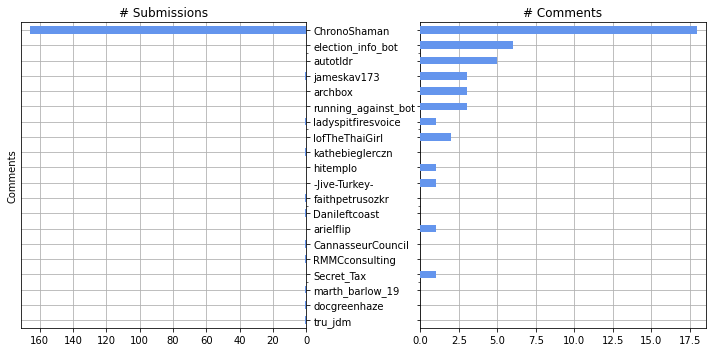

In [15]:
importlib.reload(covidStream)
covidStream.subreddit_contributor_extraction(subreddit='CannabisSessions', psawAPI=psawAPI)

### r/Boogalorian Analysis

38040


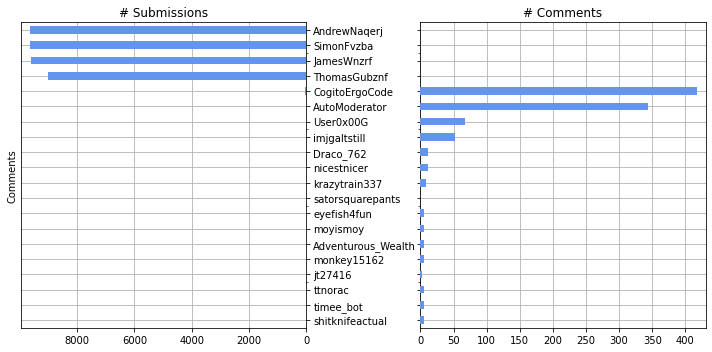

In [14]:
importlib.reload(covidStream)
covidStream.subreddit_contributor_extraction(subreddit='boogalorian', psawAPI=psawAPI)